In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train),len(X_test)


(60000, 10000)

In [5]:
X_train[0].shape , 28*28

((28, 28), 784)

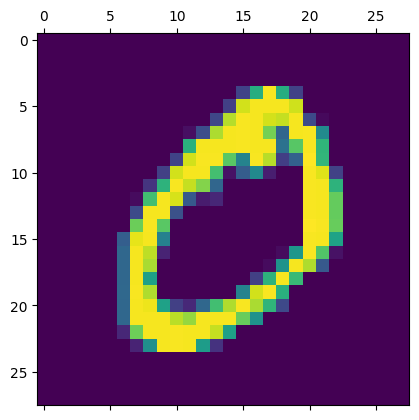

In [6]:
plt.matshow(X_train[1])

In [7]:
y_train[1]

0

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
# Now here we are scalling values to 0 to 1 and we know that the pixel values are between 0 to 255 so we will devide the variables by 255

X_train = X_train / 255
X_test = X_test / 255

# you can check the accuracy without this it will be slight lower

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train),28*28) # Converting two dimensional data to one dimensional
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [12]:
X_train_flattened.shape , X_test_flattened.shape

((60000, 784), (10000, 784))

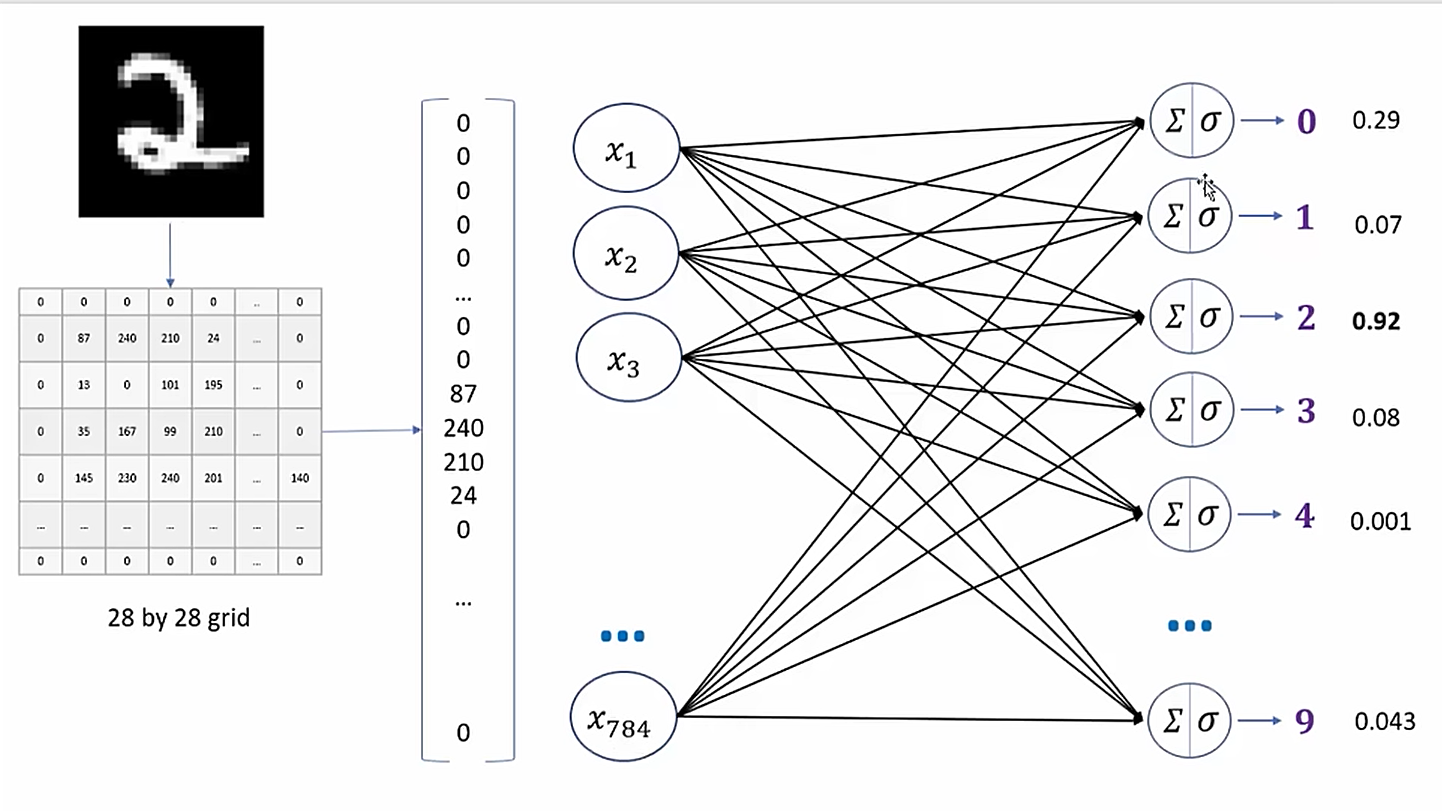

In [28]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') # here 10 is the number of classes (0-9) and 784 is the input size (28*28 flattened image)

])

#Optimizer allow you to train easily
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # here sparse_categorical_crossentropy is used for multi-class classification problems sparse means that the labels are integers (0-9) and not one-hot encoded vectors and category means that the labels are categorical variables
#https://www.tensorflow.org/api_docs/python/tf/keras/losses

model.fit(X_train_flattened,y_train,epochs=5) # epochs is the number of times the model will see the entire dataset

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8156 - loss: 0.7212
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9125 - loss: 0.3133
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9199 - loss: 0.2832
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9246 - loss: 0.2716
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9248 - loss: 0.2700


In [30]:
model.evaluate(X_test_flattened,y_test) # Accuracy of the model on the test dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9132 - loss: 0.3041


[0.2676592469215393, 0.9248999953269958]

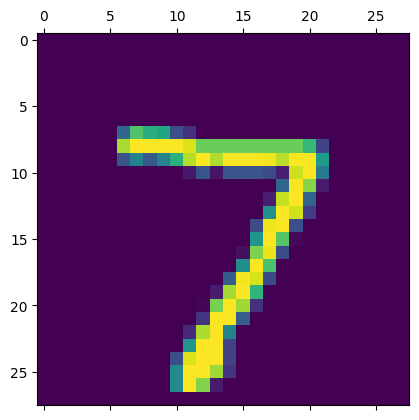

In [31]:
# Lets try this model
plt.matshow(X_test[0])

In [32]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.7881318e-02, 7.3520943e-07, 3.3854716e-02, 9.6487385e-01,
       3.1239795e-03, 1.0210351e-01, 1.6291247e-06, 9.9981922e-01,
       1.1789408e-01, 7.2648680e-01], dtype=float32)

### Now here its giving 10 values because we gave the output as 10 elements (0 to 9) so now we need to check for the highest value
we will use numpy.argmax() for this

In [ ]:
np.argmax(y_pred[0]) # Cool its working

7

In [34]:
#Lets make a confusion matrix
# Now here the y_pred is values of probabilities so we need to convert it to class labels
y_pred_classes = [np.argmax(i) for i in y_pred] # Converting probabilities to class labels
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    4,    5,    2,    2,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   9,    9,  916,   17,    7,    4,   13,   10,   43,    4],
       [   4,    0,   16,  918,    0,   28,    3,   12,   23,    6],
       [   2,    1,    2,    2,  913,    0,   11,    5,   10,   36],
       [  11,    3,    3,   29,    9,  774,   14,    9,   34,    6],
       [  14,    3,    5,    1,    7,   12,  911,    2,    3,    0],
       [   2,    5,   20,    6,    5,    0,    0,  953,    4,   33],
       [  10,    9,    6,   21,    9,   27,    9,   11,  865,    7],
       [  11,    7,    1,   10,   24,    6,    0,   25,    5,  920]])>

<Axes: >

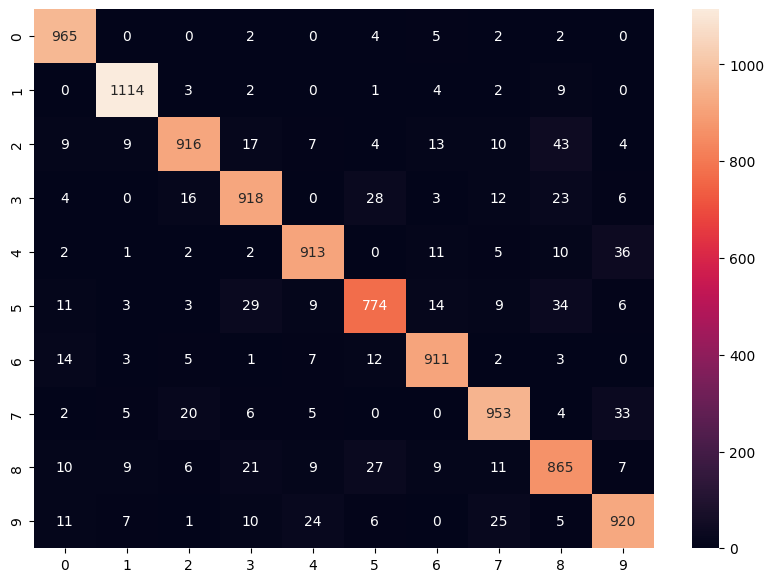

In [35]:
import seaborn as sn
plt.figure(figsize=(10,7))
plt.xlabel("Predicted")
plt.ylabel("Truth")
sn.heatmap(cm,annot=True,fmt='d')

In [36]:
# Now lets add a hidden layer to the model
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), # 100 is the number of neurons in the hidden layer and relu is the activation function
    keras.layers.Dense(10,activation='sigmoid') # here it does not require input_shape because it is the output layer and it will automatically take the input from the previous layer

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(X_train_flattened,y_train,epochs=5) 

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8662 - loss: 0.4700
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9607 - loss: 0.1349
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9731 - loss: 0.0908
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9788 - loss: 0.0696
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9839 - loss: 0.0520


In [42]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9702 - loss: 0.1012


[0.08677409589290619, 0.9746000170707703]

In [39]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([8.6262086e-03, 2.7102340e-05, 2.1353511e-02, 9.4544089e-01,
       7.4129593e-07, 2.7538225e-02, 3.6339637e-10, 9.9999630e-01,
       2.5248608e-02, 7.1221089e-01], dtype=float32)

In [40]:
y_pred_classes = [np.argmax(i) for i in y_pred] # Converting probabilities to class labels
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    1,    0,    0,    0,    0,    2,    1,    1,    1],
       [   0, 1123,    3,    1,    0,    1,    3,    2,    2,    0],
       [   6,    3,  995,    1,    2,    1,    2,   15,    6,    1],
       [   0,    0,    4,  978,    0,    5,    0,    8,    3,   12],
       [   0,    0,    1,    0,  939,    1,    9,    5,    2,   25],
       [   3,    0,    0,    7,    0,  861,    9,    2,    3,    7],
       [   6,    3,    2,    1,    1,    3,  940,    1,    1,    0],
       [   0,    4,    8,    1,    0,    0,    0, 1009,    1,    5],
       [   8,    1,    2,    3,    2,    5,    2,    6,  938,    7],
       [   3,    5,    0,    1,    5,    1,    1,    4,    0,  989]])>

<Axes: >

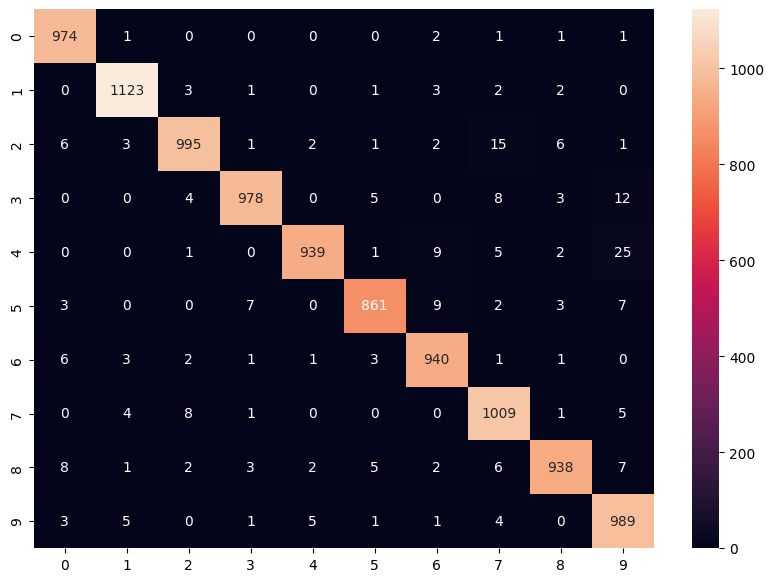

In [41]:
import seaborn as sn
plt.figure(figsize=(10,7))
plt.xlabel("Predicted")
plt.ylabel("Truth")
sn.heatmap(cm,annot=True,fmt='d')

In [ ]:
# Now if you are tired of flatterning the images you can use the flattern hidden layer

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28))
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(X_train,y_train,epochs=5) 

# Excersize: Do this after 2.7 CNN

In [13]:
cnn = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),

    keras.layers.Conv2D(filters=9, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=30, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),

    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # for 10-class classification
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5


InternalError: Graph execution error:

Detected at node 'sequential/dense/MatMul' defined at (most recent call last):
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 211, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\nabee\AppData\Local\Temp\ipykernel_27580\2932060421.py", line 20, in <module>
      cnn.fit(X_train, y_train, epochs=5, batch_size=32)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\layers\core\dense.py", line 241, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'sequential/dense/MatMul'
Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[{{node sequential/dense/MatMul}}]] [Op:__inference_train_function_833]